# Benchmarkeador

Benchmarkea os algoritmos.

In [1]:
import os
import re
import subprocess
import matplotlib.pyplot as plt
import tsp_random

In [2]:
dir = 'exemplos/my'
clean_dir = True

qty_tsps = 8

# qual o melhor jeito de avaliar um algoritmo?
# com passos lineares que nem numa PA?
# ou com passos exponenciais que nem numa PG?

start_tsp = 280
steep_tsp = 1000

epochs = 5

print('Testing between')
print(f'[{start_tsp}, {start_tsp + steep_tsp * qty_tsps}]')

Testing between
[280, 8280]


In [3]:
if not os.path.exists(dir):
    raise Exception('Directory does not exist')

In [7]:
if clean_dir:
    print('Cleaning up...')
    for f in os.listdir(dir):
        if not f.endswith(".tsp"):
            continue
        file = os.path.join(dir, f)
        print(f'{dir}/{file}', end='; ')
        os.remove(file)
    print()
    print('Done')
else:
    print('Not cleaning up')

Cleaning up...
exemplos/my/exemplos/my/random1280_1776258060053897.tsp; exemplos/my/exemplos/my/random5280_7105031994014659.tsp; exemplos/my/exemplos/my/random1280_7105031926058807.tsp; exemplos/my/exemplos/my/random2280_7105031928767695.tsp; exemplos/my/exemplos/my/random7280_1776258032387893.tsp; exemplos/my/exemplos/my/random2280_7105032240919403.tsp; exemplos/my/exemplos/my/random4280_1776257989560921.tsp; exemplos/my/exemplos/my/random5280_1776258063547241.tsp; exemplos/my/exemplos/my/random6280_888129006278693.tsp; exemplos/my/exemplos/my/random4280_7105032247385699.tsp; exemplos/my/exemplos/my/random6280_7105032264325487.tsp; exemplos/my/exemplos/my/random3280_7105031938174617.tsp; exemplos/my/exemplos/my/random280_7105032240151323.tsp; exemplos/my/exemplos/my/random280_3552515962958905.tsp; exemplos/my/exemplos/my/random3280_888129030374497.tsp; exemplos/my/exemplos/my/random7280_444064517418343.tsp; 
Done


In [4]:
def parse_time(cmd_out):
    """Parse the output of the time command

    :param cmd_out: The output of the time command
    :type cmd_out: str
    :return: A dict with the parsed values
    :rtype: dict
    """
    
    user_time = float(cmd_out.split('\n')[1].split(':')[1].strip())
    max_resident_set_size = int(cmd_out.split('Maximum resident set size (kbytes): ')[1].split('\n')[0])

    return user_time, max_resident_set_size

In [5]:
def benchmark(file_path, epochs):
    hist = []
    for i in range(epochs):
        result = subprocess.check_output(['/usr/bin/time', '-v', './trab1', file_path], stderr=subprocess.STDOUT)
        time_result = parse_time(result.decode('utf-8'))
        hist.append(time_result)

    return hist      

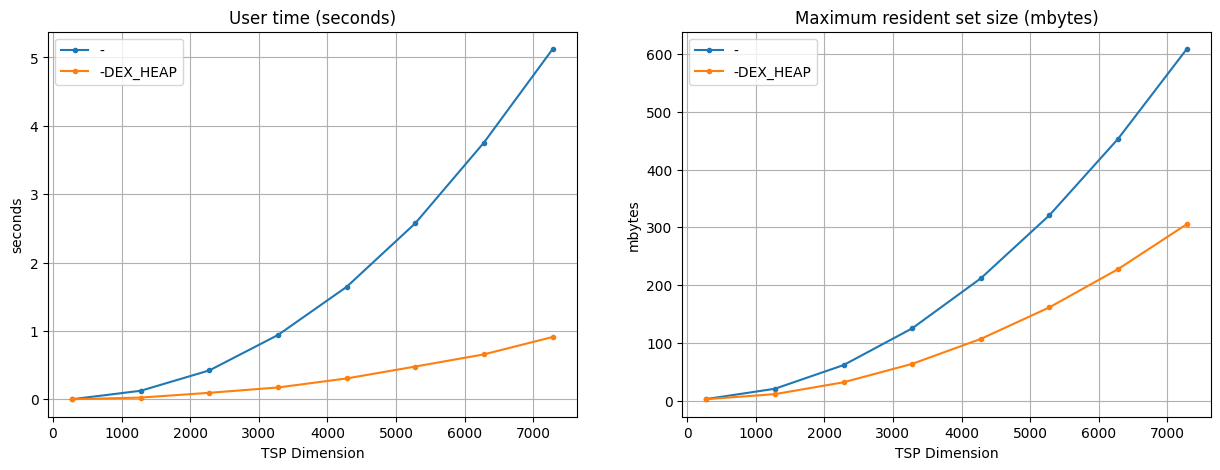

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.set_title('User time (seconds)')
ax1.set_xlabel('TSP Dimension')
ax1.set_ylabel('seconds')
ax1.grid()

ax2.set_title('Maximum resident set size (mbytes)')
ax2.set_xlabel('TSP Dimension')
ax2.set_ylabel('mbytes')
ax2.grid()

for case in ['', '-DEX_HEAP']:
    os.environ['CFLAGS'] = case
    os.system('make clean >/dev/null')
    os.system('make >/dev/null')

    x = range(start_tsp, start_tsp + steep_tsp * qty_tsps, steep_tsp)
    y_avg_time = []
    y_avg_max_ram = []

    for dim in x:
        tsp = tsp_random.random_tsp(dim, dir)

        file_path = os.path.join(dir, f'{tsp["NAME"]}.tsp')
        hist = benchmark(file_path, epochs)

        avg_elapsed_time = sum([x[0] for x in hist]) / epochs
        avg_max_ram = sum([x[1] for x in hist]) / 1024 / epochs

        y_avg_time.append(avg_elapsed_time)
        y_avg_max_ram.append(avg_max_ram)

    ax1.plot(x, y_avg_time, label=case if case != '' else '-', marker='.')
    
    ax2.plot(x, y_avg_max_ram, label=case if case != '' else '-', marker='.')

ax1.legend()
ax2.legend()

plt.show()